In [1]:
import sys
sys.path.append('/home/student/ROI/SparkProgram')

import pandas as pd
import matplotlib as mp
import numpy
from matplotlib import pyplot as plt
#from IPython.display import display

import pyspark_helpers as pyh
sc, spark, conf = pyh.initspark()
from pyspark_helpers import display

initializing pyspark
pyspark initialized


In [39]:
filename = 'bank.csv'
df = spark.read.csv(f'/home/student/ROI/Spark/datasets/finance/{filename}', header = True, inferSchema = True)
display(df)

# Save a pointer to the raw data
dfRawFile = df


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


In [41]:
# Let's just keep a few fields to start with for simplicity
numeric_features = ['age','balance', 'duration', 'pdays']
categorical_features = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'campaign', 'poutcome', 'deposit']

# numeric_features = ['balance', 'duration', 'age']
# categorical_features = ['marital', 'education']
target_label = 'default'


df = dfRawFile.select(numeric_features + categorical_features + [target_label])
display(df)
print(df.take(1))

,age,balance,duration,pdays,job,marital,education,housing,loan,contact,campaign,poutcome,deposit,default
0,59,2343,1042,-1,admin.,married,secondary,yes,no,unknown,1,unknown,yes,no
1,56,45,1467,-1,admin.,married,secondary,no,no,unknown,1,unknown,yes,no
2,41,1270,1389,-1,technician,married,secondary,yes,no,unknown,1,unknown,yes,no
3,55,2476,579,-1,services,married,secondary,yes,no,unknown,1,unknown,yes,no
4,54,184,673,-1,admin.,married,tertiary,no,no,unknown,2,unknown,yes,no
5,42,0,562,-1,management,single,tertiary,yes,yes,unknown,2,unknown,yes,no
6,56,830,1201,-1,management,married,tertiary,yes,yes,unknown,1,unknown,yes,no
7,60,545,1030,-1,retired,divorced,secondary,yes,no,unknown,1,unknown,yes,no
8,37,1,608,-1,technician,married,secondary,yes,no,unknown,1,unknown,yes,no
9,28,5090,1297,-1,services,single,secondary,yes,no,unknown,3,unknown,yes,no


[Row(age=59, balance=2343, duration=1042, pdays=-1, job='admin.', marital='married', education='secondary', housing='yes', loan='no', contact='unknown', campaign=1, poutcome='unknown', deposit='yes', default='no')]


  summary                 age             balance            duration  \
0   count               11162               11162               11162   
1    mean  41.231947679627304  1528.5385235620856  371.99381831213043   
2  stddev  11.913369192215518   3225.413325946149  347.12838571630687   
3     min                  18               -6847                   2   
4     max                  95               81204                3881   

                pdays  
0               11162  
1   51.33040673714388  
2  108.75828197197717  
3                  -1  
4                 854  


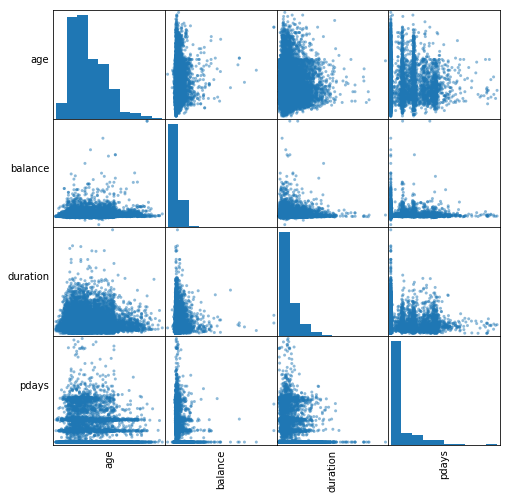

In [42]:
%matplotlib inline
# import imp
# imp.reload(pyh)

pyh.describe_numeric_features(df, numeric_features)
pyh.scatter_matrix(df, numeric_features)


In [43]:

# print('Convert string features to indexed numeric values')
# df1 = pyh.StringIndexEncode(df, categorical_features + [target_label])
# display(df1)

# print('Convert indexed features to OneHotEncoded sparse matrix')
# df2 = pyh.OneHotEncode(df1, categorical_features)
# display(df2)

# print('Assemble all features and target label into vectors')
# df3 = pyh.AssembleFeatures(df2, categorical_features, numeric_features, target_label + '_Index')
# display(df3)
# df3.printSchema()

dfML = pyh.MakeMLDataFrame(df, categorical_features, numeric_features, target_label)
display(dfML)
dfML.printSchema()
display(dfML.groupBy('label').count())


,label,features
0,0.0,"(0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,0.0,"(0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,0.0,"(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,0.0,"(0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ..."
4,0.0,"(0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
5,0.0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
6,0.0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
7,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ..."
8,0.0,"(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
9,0.0,"(0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ..."


root
 |-- label: double (nullable = false)
 |-- features: vector (nullable = true)



,label,count
0,0.0,10994
1,1.0,168


In [44]:
train, test = dfML.randomSplit([.7,.3], seed = 1000)
print (f'Training set row count {train.count()}')
print (f'Testing set row count {test.count()}')
      

Training set row count 7760
Testing set row count 3402


In [45]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=10)
lrModel = lr.fit(train)
print('LR Trained')

filename1 = filename.replace('.','_') + '_LR_trainedModel'
lrModel.write().overwrite().save(filename1)
print('LR Saved')


LR Trained
LR Saved


In [ ]:
#lrModel2 = LogisticRegression.load(filename1)

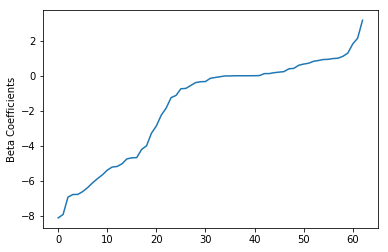

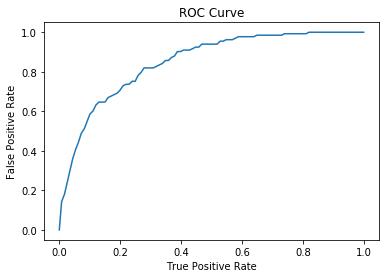

Training set area Under ROC: 0.8494268975178212


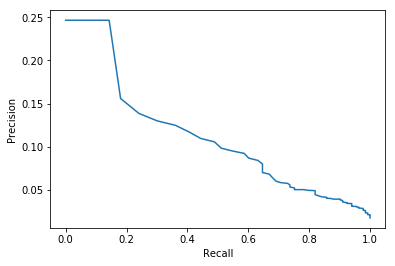

Test Area Under ROC 0.7097797954940892
+----------+-----+
|prediction|count|
+----------+-----+
|       0.0| 3401|
|       1.0|    1|
+----------+-----+

+-----+--------------------+----------+--------------------+
|label|       rawPrediction|prediction|         probability|
+-----+--------------------+----------+--------------------+
|  0.0|[9.42364001124095...|       0.0|[0.99991921512490...|
|  0.0|[2.95208576181042...|       0.0|[0.95036197483746...|
|  0.0|[2.96886092090748...|       0.0|[0.95114737569167...|
|  0.0|[3.19005581448813...|       0.0|[0.96045834023268...|
|  0.0|[5.40263793281363...|       0.0|[0.99551551895549...|
|  0.0|[2.59306276452885...|       0.0|[0.93041377429167...|
|  0.0|[4.07532749187674...|       0.0|[0.98329707596176...|
|  0.0|[3.80874735512549...|       0.0|[0.97830516325732...|
|  0.0|[6.11724590958819...|       0.0|[0.99780033015922...|
|  0.0|[8.75060606256270...|       0.0|[0.99984165975886...|
|  0.0|[3.39574568609762...|       0.0|[0.96757131261

In [46]:
lrPredictions, lrLog = pyh.predict_and_evaluate(lrModel, test)



In [28]:
from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 3)
dtModel = dt.fit(train)
print('DT Trained')

filename1 = filename.replace('.','_') + '_DT_trainedModel'
dtModel.write().overwrite().save(filename1)
print('DT Saved')


DT Trained
DT Saved


In [29]:
dtPredictions, dtLog = pyh.predict_and_evaluate(dtModel, test)


Test Area Under ROC 0.5
+----------+-----+
|prediction|count|
+----------+-----+
|       0.0| 3402|
+----------+-----+

+-----+--------------+----------+--------------------+
|label| rawPrediction|prediction|         probability|
+-----+--------------+----------+--------------------+
|  0.0|[7627.0,133.0]|       0.0|[0.98286082474226...|
|  0.0|[7627.0,133.0]|       0.0|[0.98286082474226...|
|  0.0|[7627.0,133.0]|       0.0|[0.98286082474226...|
|  0.0|[7627.0,133.0]|       0.0|[0.98286082474226...|
|  0.0|[7627.0,133.0]|       0.0|[0.98286082474226...|
|  0.0|[7627.0,133.0]|       0.0|[0.98286082474226...|
|  0.0|[7627.0,133.0]|       0.0|[0.98286082474226...|
|  0.0|[7627.0,133.0]|       0.0|[0.98286082474226...|
|  0.0|[7627.0,133.0]|       0.0|[0.98286082474226...|
|  0.0|[7627.0,133.0]|       0.0|[0.98286082474226...|
|  0.0|[7627.0,133.0]|       0.0|[0.98286082474226...|
|  0.0|[7627.0,133.0]|       0.0|[0.98286082474226...|
|  0.0|[7627.0,133.0]|       0.0|[0.98286082474226...|


In [48]:
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label')
rfModel = rf.fit(train)
print('RF Trained')

filename1 = filename.replace('.','_') + '_RF_trainedModel'
rfModel.write().overwrite().save(filename1)
print('RF Saved')



RF Trained
RF Saved


In [49]:
rfPredictions, rfLog = pyh.predict_and_evaluate(rfModel, test)



Test Area Under ROC 0.7829139971997093
+----------+-----+
|prediction|count|
+----------+-----+
|       0.0| 3402|
+----------+-----+

+-----+--------------------+----------+--------------------+
|label|       rawPrediction|prediction|         probability|
+-----+--------------------+----------+--------------------+
|  0.0|[19.6964859322311...|       0.0|[0.98482429661155...|
|  0.0|[19.6062072848825...|       0.0|[0.98031036424412...|
|  0.0|[19.6779550032785...|       0.0|[0.98389775016392...|
|  0.0|[19.6779550032785...|       0.0|[0.98389775016392...|
|  0.0|[19.6779550032785...|       0.0|[0.98389775016392...|
|  0.0|[19.5844849901852...|       0.0|[0.97922424950926...|
|  0.0|[19.7912965658584...|       0.0|[0.98956482829292...|
|  0.0|[19.8098274948110...|       0.0|[0.99049137474055...|
|  0.0|[19.8058985510196...|       0.0|[0.99029492755098...|
|  0.0|[19.8244294799723...|       0.0|[0.99122147399861...|
|  0.0|[19.6779550032785...|       0.0|[0.98389775016392...|
|  0.0|[19.

In [50]:
from pyspark.ml.classification import GBTClassifier
gbt = GBTClassifier(maxIter=10)
gbtModel = gbt.fit(train)
print ('GBT Trained')

filename1 = filename.replace('.','_') + '_GBT_trainedModel'
rfModel.write().overwrite().save(filename1)
print ('GBT Saved')



GBT Trained
GBT Saved


In [33]:
gbtPredictions, gbtLog = pyh.predict_and_evaluate(gbtModel, test)



Test Area Under ROC 0.7676439390725107
+----------+-----+
|prediction|count|
+----------+-----+
|       0.0| 3397|
|       1.0|    5|
+----------+-----+

+-----+--------------------+----------+--------------------+
|label|       rawPrediction|prediction|         probability|
+-----+--------------------+----------+--------------------+
|  0.0|[1.18383631887879...|       0.0|[0.91432873002556...|
|  0.0|[1.18383631887879...|       0.0|[0.91432873002556...|
|  0.0|[1.18383631887879...|       0.0|[0.91432873002556...|
|  0.0|[0.92390522055658...|       0.0|[0.86386981867659...|
|  0.0|[1.11376149194646...|       0.0|[0.90269400092948...|
|  0.0|[0.92390522055658...|       0.0|[0.86386981867659...|
|  0.0|[1.11376149194646...|       0.0|[0.90269400092948...|
|  0.0|[1.18383631887879...|       0.0|[0.91432873002556...|
|  0.0|[1.20781430687635...|       0.0|[0.91801132609717...|
|  0.0|[1.19308493814084...|       0.0|[0.91576658956683...|
|  0.0|[1.18383631887879...|       0.0|[0.91432873002